In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from numpy.linalg import norm
from numpy.linalg import inv

In [2]:
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LassoCV, RidgeCV

In [4]:
import scipy.stats as stat

In [5]:
print(pd.__version__)
print(np.__version__)

1.1.3
1.19.2


#### Q1 Data Preprocess

In [164]:
data = pd.read_csv('data_dm3.csv',header=None)

In [165]:
data

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,-0.270323,-0.437638,0.347423,-0.123436,0.344168,-0.777434,-1.380455,0.491346,0.713854,-0.693186,...,-0.051364,-0.371945,-0.114830,0.153832,-0.973347,-0.997793,0.158006,-0.139519,1.010518,178.0
438,0.872196,0.975497,0.819331,-0.975557,-0.968388,1.029983,-0.079420,-0.130714,0.201144,-2.390860,...,-0.327924,0.350886,-0.305686,-1.292688,0.124676,1.465920,0.663206,1.278693,0.419890,104.0
439,-0.032586,-0.571893,0.806842,0.562865,1.194239,-0.345469,0.717316,0.234458,1.546961,0.554013,...,-1.467585,0.584516,-0.281854,-0.618165,0.840381,1.261452,-0.084541,0.301755,0.517624,132.0
440,-1.529754,0.756967,2.251588,-0.052600,0.502047,0.046229,-1.571494,0.238793,-1.211869,-0.896148,...,-0.000023,-2.231379,-0.880398,0.267481,1.036171,-0.962587,0.491072,-1.389069,0.473725,220.0


In [166]:
n,p = data.shape
p-=1

In [167]:
means = np.mean(data,0)
#np.abs(means)

In [168]:
print('Data X Is Centralised ',(np.abs(means[:-1])<1e-3).all())

Data X Is Centralised  True


In [169]:
print('The center of the Y:',float(np.abs(means[-1:])))

The center of the Y: 152.13348416289594


In [170]:
stds = np.sqrt(np.var(data,0))

In [171]:
stds

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
         ...    
206     1.000000
207     1.000000
208     1.000000
209     1.000000
210    77.005746
Length: 211, dtype: float64

In [172]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [174]:
#print(skl.__version__)

In [175]:
scaler = preprocessing.StandardScaler().fit(X_train) 
# because of the version of scikitlearn, we cannot use the fit_transform 
# but only the seperately fit() and transform()

X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)

In [176]:
np.shape(X_train_transform)

(331, 210)

In [177]:
np.shape(X_test_transform)

(111, 210)

In [178]:
df_test = pd.DataFrame()
df_coef = pd.DataFrame()

#### Q2 

In [179]:
def coef(X,y):
    return inv(X.T @ X) @ X.T @ y

In [180]:
def mean_squared_error(y1,y2):
    return np.square(np.subtract(y1,y2)).mean()

#### Q3

In [181]:
linreg = LinearRegression()

In [182]:
linreg.fit(X_train_transform,Y_train)

LinearRegression()

In [183]:
print("The number of coefficients for the model of OLS:",np.size(linreg.coef_))

The number of coefficients for the model of OLS: 210


In [184]:
mse_test = mean_squared_error(linreg.predict(X_test_transform),Y_test)
print('The MSE for the test data is {:.4f}'.format(mse_test))

The MSE for the test data is 3712.2304


In [185]:
df_test['OLS'] = linreg.predict(X_test_transform)
df_coef['OLS'] = linreg.coef_

In [186]:
print("The intercept value of OLS model: ",linreg.intercept_)

The intercept value of OLS model:  154.28548680283376


In [187]:
print("The mean of the training Y: ",Y_train.mean())

The mean of the training Y:  154.34441087613294


### PCA

#### Q4

In [188]:
import seaborn as sns

Because the data has been standardized, the covariance $X.cov()$ has the same effect as the correlationship $X.corr()$.

<AxesSubplot:>

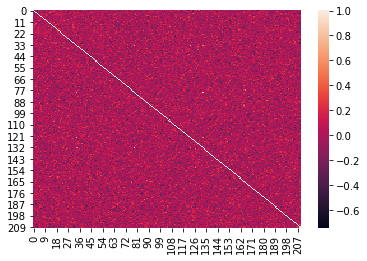

In [189]:
sns.heatmap(X.cov())

We note $U$ and $V$ 2 orthonormal matrix of scale $442*442$ and $210*210$
$$
\begin{equation}
X = U \Sigma V^{T}  
\end{equation}
$$
$$
\begin{equation}
442* X.cov = X^{T}X = V \Sigma U^{T}  U \Sigma V^{T}  = V \Sigma^2 V^{T}
\end{equation}
$$

Here we note the $X^{T}X$ is of the size $210*210$. For the consistency with the requirement of the conseils in the question 4, we note $U =V$ and $V = V^T$
$$
\begin{equation}
442* X.cov = X^{T}X = U \Sigma^2 V
\end{equation}
$$

In [190]:
U,s,V = np.linalg.svd(X.cov())

<AxesSubplot:>

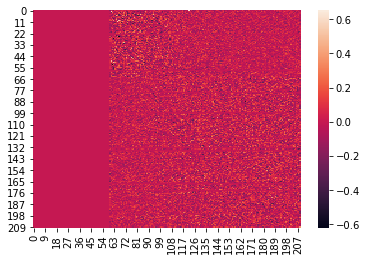

In [191]:
sns.heatmap(U-V.T)

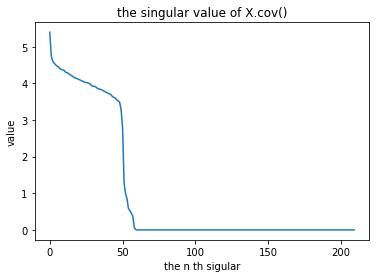

In [192]:
plt.plot([i for i in range(len(s))],s)
plt.title('the singular value of X.cov()')
plt.xlabel('the n th sigular')
plt.ylabel('value')
plt.show()

#### Q5

here we note the gram matrix as $ G = (n-1)^{-1}X^{T}X =  (n-1)^{-1}||X||^2$ and whose eigenvalue(=singular value) as $\lambda_{i}$

The singular value for the $X$ matrix is noted as $\sigma_i$

Moreover we have 
$$
\begin{equation}
 X^{T}X = U \Sigma^2 V = U \Sigma^2 U^{T}
\end{equation}
$$

The  it is obvious that $\lambda_{i}*(n-1) = \sigma_i^2$

Then the following we are going to verify the relationship

In [235]:
_,sigma,_ = np.linalg.svd(X)  ## what returned is the sigma
lamb2,_ = np.linalg.eigh(X.T@X/(n-1))  ## what returned is the square of lambda in an ascending order, that is why we inverse the lamb2 using lamb2[::-1]

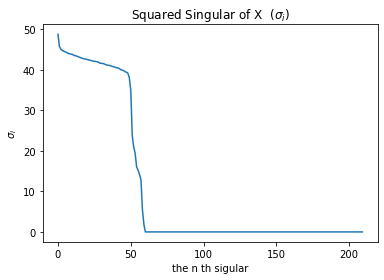

In [236]:
plt.plot([i for i in range(len(sigma))],sigma)
plt.title('Squared Singular of X  ($\sigma_i$)')
plt.xlabel('the n th sigular')
plt.ylabel('$\sigma_i$')
plt.show()

<ipython-input-237-e1041b355b0b>:1: RuntimeWarning: invalid value encountered in sqrt
  plt.plot([i for i in range(len(lamb2[::-1]))],np.sqrt(lamb2[::-1]))


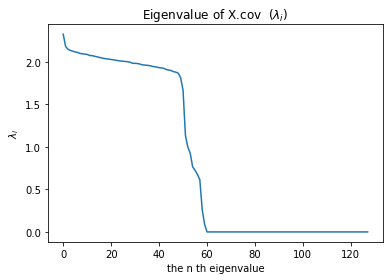

In [237]:
plt.plot([i for i in range(len(lamb2[::-1]))],np.sqrt(lamb2[::-1]))
plt.title('Eigenvalue of X.cov  ($\lambda_i $)')
plt.xlabel('the n th eigenvalue')
plt.ylabel('$\lambda_i $')
plt.show()

In [227]:
print("The division of sigma_i^2 and lambda_i:\n",sigma[sigma>1e-3]**2/lamb2[::-1][sigma>1e-3])

The division of sigma_i^2 and lambda_i:
 [441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441.
 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441.
 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441.
 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441. 441.
 441. 441. 441. 441.]


In [217]:
print("the n-1 value is:",n-1)

the n-1 value is: 441


In [234]:
print('the equality relation holds:\n',np.abs(sigma[sigma>1e-3]**2./lamb2[::-1][sigma>1e-3]-(n-1))<1e-3)

the equality relation holds:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


So we conclude that the relation holds.

#### Q6

The gram matrix is $ G = (n-1)^{-1}X^{T}X $ and its eigenvalues are $\lambda_{i}$

De plus on a
$$
\begin{equation}
 X^{T}X = U \Sigma^2 V = U \Sigma^2 U^{T}
\end{equation}
$$

In [238]:
print('The variance explained by the first 2 component explained is:',np.sqrt(lamb2[::-1][sigma>1e-3])[0:2])

The variance explained by the first 2 component explained is: [2.32254788 2.17857494]


In [239]:
variance_explained_percent = []
sum_variance = np.sum(np.sqrt(lamb2[::-1][sigma>1e-3]))
for i in np.sqrt(lamb2[::-1][sigma>1e-3]):
    variance_explained_percent.append((i/sum_variance*100))

In [240]:
print('The percentage that the first 2 component explained is:',variance_explained_percent[0:2],"%")

The percentage that the first 2 component explained is: [2.142995389236665, 2.0101527759947397] %


In [241]:
projection_2 = X@U[:,0:2]

In [242]:
print("the output dimension of the samples on the 2 major principles(X*U[:2]):",np.shape(projection_2))

the output dimension of the samples on the 2 major principles(X*U[:2]): (442, 2)


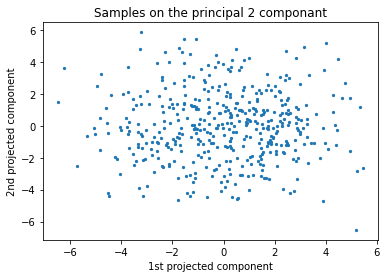

In [243]:
plt.scatter(projection_2[:][0],projection_2[:][1],s=5)

plt.title('Samples on the principal 2 componant')
#for i in range(210):
#  plt.arrow(0,0,U[i][0]*np.sqrt(s[0]),U[i][1]*np.sqrt(s[1]),label = '{}th variable'.format(i))
#plt.figure(figsize=(0.01,0.01))
plt.xlabel('1st projected component')
plt.ylabel('2nd projected component')
plt.show()

#### Q7

No handles with labels found to put in legend.


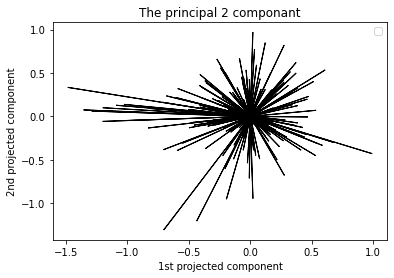

In [253]:
#plt.scatter(projection_2[:][0],projection_2[:][1],s=5)

plt.title('The principal 2 componant')
for i in range(210):
  plt.arrow(0,0,U[i][0]*s[0],U[i][1]*s[1])
#plt.figure(figsize=(0.01,0.01))
plt.xlabel('1st projected component')
plt.ylabel('2nd projected component')
plt.legend()
plt.show()

In [245]:
print("Non-zero singular values in a descending order:\n",s[:60])

Non-zero singular values in a descending order:
 [5.39422863 4.74618878 4.60460737 4.54825735 4.5062399  4.4704636
 4.44750752 4.39838176 4.38018002 4.36368385 4.34867921 4.29734992
 4.2897758  4.26295438 4.2346888  4.20762974 4.18569519 4.15357968
 4.13910361 4.12340483 4.10496393 4.08622908 4.06862642 4.05288811
 4.03154283 4.02028459 4.01381701 3.99809762 3.96882727 3.92486833
 3.92263528 3.91401907 3.88934424 3.85570137 3.84260518 3.82963018
 3.81834738 3.78801536 3.77137575 3.7503502  3.72461105 3.71420774
 3.69309445 3.63982589 3.61592349 3.59604058 3.54469163 3.52432593
 3.47604268 3.27789797 2.76726786 1.28199773 0.9938729  0.85376106
 0.58522895 0.52496482 0.4567792  0.37521448 0.06770314 0.00796972]


In [125]:
print("The dimension of U:",np.shape(U))

The dimension of U: (210, 210)


#### Q8

We found that the non-zero singular value is s[:60].

Thus the U[:,:60] contains the eigenvectors associated with the 60 largest eigenvalues

There is a misunderstanding of the question, should we use the 60 or the 2 largest?

Here as a demo i choose the 60 largest eigenvalues

In [52]:
X_train_projected = X_train@U[:,:60]
X_test_projected  = X_test@U[:,:60]

In [255]:
print("The projected train data dimension:\n",np.shape(X_train_projected))

The projected train data dimension:
 (331, 60)


In [257]:
linreg_p8 = LinearRegression()
linreg_p8.fit(X_train_projected,Y_train)
print('The coefficients of regression on the principal 60 components:\n',linreg_p8.coef_)

The coefficients of regression on the principal 60 components:
 [-14.2969313   -0.34295596   0.96121716  -5.32053689   2.35638966
  -3.32089977  -3.43466656  -1.45891946   2.03922791  -3.12407097
   0.50145095  -1.28235499  -2.07793144   0.86662805  -0.08890281
   1.95000231   2.7445319   -2.70864846   2.3329543    1.55173635
  -0.5185701   -2.55614373  -0.4588018    0.64197355   1.07423436
  -3.36240712  -3.10452841   3.43563574  -0.33308245  -0.21315167
  -0.97254021  -1.08399314  -1.24951773  -1.10023357   0.11381858
  -2.50659729   1.96344469   0.24894735  -1.54678196   1.37554413
   4.33502694  -2.23880047   2.14606844  -0.44752138  -0.85195491
  -3.97305108   0.39357655  -3.16905263  -1.06026464   5.18142447
  12.0955378   14.43827019  -5.14089116  26.31247433  -0.82916232
   7.69290972 -10.14893892  -1.34025496 -14.68428547 -61.55186244]


In [55]:
mse_test_p8 = mean_squared_error(linreg_p8.predict(X_test_projected),Y_test)
print('The MSE for the test data is {:.4f}'.format(mse_test_p8))

The MSE for the test data is 3023.4697


In [258]:
print("The predicted result on the test set with OLS after PCA:\n",np.shape(linreg_p8.predict(X_test_projected)))

The predicted result on the test set with OLS after PCA:
 (111,)


In [57]:
df_test['pca_ols'] = linreg_p8.predict(X_test_projected)

#### Q9

In [58]:
lassocv = LassoCV(alphas = np.logspace(-3,1,num=30))


In [ ]:
lassocv.fit(X_train_transform,Y_train)
print("The lasso model coefficients:\n",lassocv.coef_)

In [60]:
mse_test_p9 = mean_squared_error(lassocv.predict(X_test_transform),Y_test)
print('The Lasso MSE for the test data is {:.4f}'.format(mse_test_p9))

The Lasso MSE for the test data is 2791.1603


In [61]:
print('The Lasso regulization parameter is {:.4f}'.format(lassocv.alpha_))

The Lasso regulization parameter is 5.2983


In [62]:
df_test['lasso'] = lassocv.predict(X_test_transform)
df_coef['lasso'] = lassocv.coef_

#### Q10

In [63]:
ridgecv = RidgeCV(alphas = np.logspace(-1,2,num=30))

In [130]:
ridgecv.fit(X_train_transform,Y_train)
#print("The rigde model coefficient:\n",ridgecv.coef_)

RidgeCV(alphas=array([  0.1       ,   0.1268961 ,   0.1610262 ,   0.20433597,
         0.25929438,   0.32903446,   0.41753189,   0.52983169,
         0.67233575,   0.85316785,   1.08263673,   1.3738238 ,
         1.74332882,   2.21221629,   2.8072162 ,   3.56224789,
         4.52035366,   5.73615251,   7.27895384,   9.23670857,
        11.72102298,  14.87352107,  18.87391822,  23.9502662 ,
        30.39195382,  38.56620421,  48.93900918,  62.10169419,
        78.80462816, 100.        ]))

In [65]:
mse_test_p10 = mean_squared_error(ridgecv.predict(X_test_transform),Y_test)
print('The Ridge MSE for the test data is {:.4f}'.format(mse_test_p10))

The Ridge MSE for the test data is 2936.0577


In [66]:
print('The Ridge regulization parameter is {:.4f}'.format(ridgecv.alpha_))

The Ridge regulization parameter is 62.1017


In [67]:
df_test['Ridge'] = ridgecv.predict(X_test_transform)
df_coef['Ridge'] = ridgecv.coef_

#### Q11

In [68]:
def t_p_value(t_stat, deg):
    # compute the p-value if t_stat follows a Student of degree deg
    p_val = (1 - stat.t.cdf(abs(t_stat), deg)) * 2
    return p_val
    

In [69]:
t_p_value(np.array([1,2,3]),10).min()

0.013343655022569623

In [70]:
def linear_reg(X,y):
 beta = 1/np.shape(X)[0]*X.T@y
 #beta = 1/(X.T @ X)*X.T@y
 u=y-X@beta
 n,k = np.shape(X)
 sig2=u.T@u/(n-k)
 Var=sig2*1/(np.diag(X.T @ X))
 std=np.sqrt(Var)
 return beta, u, sig2, Var, std, n-k,

In [71]:
def variable_forward_select(X,Y):
    n,p = np.shape(X)
    resid = []
    ind_p = [i for i in range(p)]
    ind_l = []
    remains = [True]*p
    resid.append(Y)

    while len(ind_l)<p:
        p_val = []
        beta= []
        #std = []
        y = resid[-1]
        for i in ind_p:
            beta_,_,_,_,std, deg_t = linear_reg(X[:,[0,i]],y)
            test = beta_/std
            beta.append(beta_)
            p_val.append(t_p_value(test[1], deg_t))
            
        p_val = np.array(p_val)
        ind_l.append(ind_p.pop(p_val.argmin()))
    
        resid.append ( y-X[:,[0,ind_l[-1]]]@beta[p_val.argmin()].T)
        remains[ind_l[-1]] = False
    
    
        
    return ind_l
    

Here we add the constant one column to the train data

In [72]:
variable_order = variable_forward_select(np.column_stack((np.ones(np.shape(X_train_transform)[0],),X_train_transform)),Y_train)

In [139]:
print("the selected variable in order is:\n",variable_order)

the selected variable in order is:
 [0, 59, 124, 168, 134, 85, 14, 175, 136, 209, 21, 125, 158, 188, 130, 142, 70, 92, 82, 35, 206, 44, 99, 161, 133, 94, 195, 190, 147, 131, 163, 120, 89, 171, 95, 65, 148, 107, 69, 162, 24, 68, 140, 165, 135, 80, 36, 26, 155, 197, 182, 76, 33, 114, 104, 7, 52, 96, 121, 81, 64, 192, 152, 186, 101, 208, 145, 39, 200, 116, 13, 58, 119, 83, 193, 34, 2, 48, 10, 74, 204, 146, 78, 5, 31, 93, 172, 112, 100, 47, 185, 180, 20, 90, 87, 118, 54, 38, 77, 41, 56, 61, 9, 4, 109, 143, 23, 73, 198, 8, 153, 164, 151, 159, 199, 75, 144, 113, 170, 202, 57, 167, 45, 49, 111, 43, 174, 42, 19, 141, 187, 55, 63, 123, 117, 50, 71, 105, 181, 150, 126, 15, 128, 115, 46, 37, 25, 132, 22, 149, 169, 79, 29, 66, 176, 32, 194, 84, 177, 1, 97, 183, 51, 201, 127, 139, 122, 72, 67, 191, 40, 129, 138, 60, 156, 28, 157, 196, 98, 207, 178, 17, 103, 173, 11, 210, 184, 88, 110, 62, 53, 189, 30, 179, 86, 106, 137, 166, 3, 18, 102, 154, 91, 108, 205, 160, 27, 6, 16, 12, 203]


In [141]:
print("The number of selected variable:",len(variable_order))

The number of selected variable: 211


Since we do not set a stop criterion, all the variables would be selected at the end.

#### Q12

In [78]:
def variable_forward_select_with_stop(X,Y,thres = 5e-2):
    n,p = np.shape(X)
    #iter=0
    p_iter = [0]          # The historical smallest p_value
    resid = [Y]             
    ind_p = [i for i in range(p)]    # The indice for those p-l
    ind_l = []                       # The indice for those l
    remains = [True]*p
    

    #print(sig_0)
    #print(var_0)
    #print(beta_0)
    #print(std_0)

    #test_0[np.isnan(test_0)] = 0
    #print(test_0)
    #plt.figure(figsize=(7, 7))

    #print(test_0)
    #print(p_val)
    

    
    while (p_iter[-1]<thres):
        p_val = []
        beta= []
        y = resid[-1]
        test_t = []
        for i in ind_p:
            beta_,_,_,_,std, deg_t = linear_reg(X[:,[0,i]],y)
            test = beta_/std
            beta.append(beta_)
            p_val.append(t_p_value(test[1], deg_t))
            test_t.append(test[1])
            
        #test[np.isnan(test)] = 0
        p_val = np.array(p_val)
        if len(ind_l)<4:
                plt.subplot(4,1,len(ind_l)+1)
                plt.plot(ind_p,test_t,'o',markersize = 2)
                plt.scatter(ind_p[p_val.argmin()],test_t[p_val.argmin()],color = 'r')
                plt.title('The {}th test statistics for those variables'.format(len(ind_l)))
        
        ind_l.append(ind_p.pop(p_val.argmin()))
    
        resid.append ( y-X[:,[0,ind_l[-1]]]@beta[p_val.argmin()].T)
        remains[ind_l[-1]] = False
    

        
        p_iter.append(p_val.min())

    #print(deg_t)     
    ##print(beta)        
    #print(p_val)
    #print(p_iter)
    plt.suptitle('the selected data with test stats')
    plt.show()
    #ax = fig.add_subplot()
    

    return ind_l,remains,p_iter


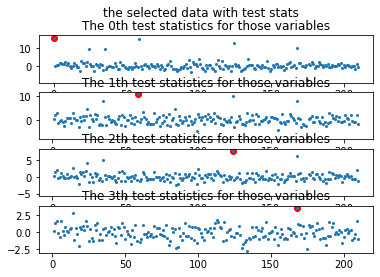

In [79]:
variable_order_05,remains_05,p_iter_ = variable_forward_select_with_stop(np.column_stack((np.ones(np.shape(X_train)[0],),X_train)),Y_train)

Here, we add the constant column to the selection of variable. The first iteration picked out the constant variable. Then the 59th, 124th, 168th variable successively.

In [143]:
print("The selected variable in order with stop condition p-value<0.05:\n",variable_order_05)

The selected variable in order with stop condition p-value<0.05:
 [0, 59, 124, 168, 134, 85, 14, 175, 136, 130]


In [142]:
print("the smallest p-value in each iteration is:\n",p_iter_)

the smallest p-value in each iteration is:
 [0, 0.0, 0.0, 1.1013412404281553e-13, 0.0004401500985797835, 0.000280166604834875, 0.014535804524703488, 0.018190028747402387, 0.04420728014900255, 0.025729180691421494, 0.07762266139701568]


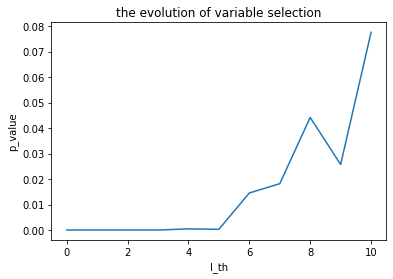

In [82]:
plt.plot([i for i in range(len(p_iter_))],p_iter_[:])
plt.xlabel('l_th')
plt.ylabel('p_value')
plt.title('the evolution of variable selection')
plt.show()

We notice that the p-value will increase until it reach 0.05

#### Q13

In [145]:
#print(variable_order_05)
select_v = [bool(True-i) for i in remains_05]
print("The boolean representation (selected or not) of total variable:\n",select_v)

The boolean representation (selected or not) of total variable:
 [True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, Tr

In [147]:
linreg_p13 = LinearRegression()
linreg_p13.fit(X_train_transform[:,select_v[1:]],Y_train)
print("The coefficient number of the FVS regression: ",len(linreg_p13.coef_))

The coefficient number of the FVS regression:  9


In [85]:
mse_test_p13 = mean_squared_error(linreg_p13.predict(X_test_transform[:,select_v[1:]]),Y_test)
print('The MSE for the test data is {:.4f}'.format(mse_test_p13))

The MSE for the test data is 2842.0032


In [86]:
df_test['FVS'] = linreg_p13.predict(X_test_transform[:,select_v[1:]])


In [87]:
df_coef['FVS'] = [int(i) for i in select_v[1:]]
df_coef.loc[df_coef['FVS']==1,'FVS'] = linreg_p13.coef_

#### Q14

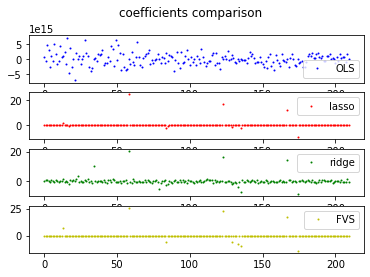

In [88]:
plt.suptitle('coefficients comparison')
plt.subplot(4,1,1)
plt.plot(df_coef.iloc[:,0], 'o', markersize = 1,color = 'b',label = 'OLS')
plt.legend()
plt.subplot(4,1,2)
plt.plot(df_coef.iloc[:,1], 'o', markersize = 1,color = 'r',label = 'lasso')
plt.legend()
plt.subplot(4,1,3)
plt.plot(df_coef.iloc[:,2], 'o', markersize = 1,color = 'g',label = 'ridge')
plt.legend()
plt.subplot(4,1,4)
plt.plot(df_coef.iloc[:,3], 'o', markersize = 1,color = 'y',label = 'FVS')
plt.legend()
plt.show()


#### Q15

In [89]:
print('The zero coefficient variable number for the OLS is {}'.format(len(df_coef[np.abs(df_coef['OLS'])<1e-2])))
print('The zero coefficient variable number for the Lasso is {}'.format(len(df_coef[np.abs(df_coef['lasso'])<1e-2])))
print('The zero coefficient variable number for the Ridge is {}'.format(len(df_coef[np.abs(df_coef['Ridge'])<1e-2])))
print('The zero coefficient variable number for the FVS is {}'.format(len(df_coef[np.abs(df_coef['FVS'])<1e-2])))

The zero coefficient variable number for the OLS is 0
The zero coefficient variable number for the Lasso is 200
The zero coefficient variable number for the Ridge is 3
The zero coefficient variable number for the FVS is 201


For Lasso and Ridge, the zero coefficient variable number is 200 and 3 respectively. The reason why the number is so different is that the lasso is a 1-norm regulization which reduce those tiny coefficients directly to 0. While the Ridge is a 2-norm regularization that reduce the small coefficient but not exactly to 0.

#### Q16

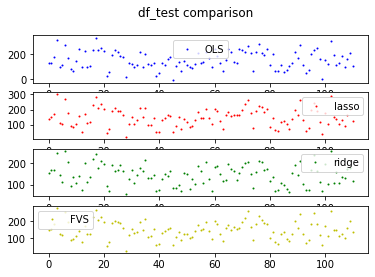

In [90]:
plt.suptitle('df_test comparison')
plt.subplot(4,1,1)
plt.plot(df_test.iloc[:,0], 'o', markersize = 1,color = 'b',label = 'OLS')
plt.legend()
plt.subplot(4,1,2)
plt.plot(df_test.iloc[:,1], 'o', markersize = 1,color = 'r',label = 'lasso')
plt.legend()
plt.subplot(4,1,3)
plt.plot(df_test.iloc[:,2], 'o', markersize = 1,color = 'g',label = 'ridge')
plt.legend()
plt.subplot(4,1,4)
plt.plot(df_test.iloc[:,3], 'o', markersize = 1,color = 'y',label = 'FVS')
plt.legend()
plt.show()

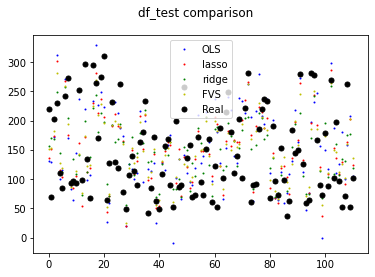

In [91]:
plt.suptitle('df_test comparison')

plt.plot(df_test.iloc[:,0], 'o', markersize = 1,color = 'b',label = 'OLS')
plt.legend()

plt.plot(df_test.iloc[:,1], 'o', markersize = 1,color = 'r',label = 'lasso')
plt.legend()

plt.plot(df_test.iloc[:,2], 'o', markersize = 1,color = 'g',label = 'ridge')
plt.legend()

plt.plot(df_test.iloc[:,3], 'o', markersize = 1,color = 'y',label = 'FVS')
plt.legend()

plt.plot([i for i in range(len(Y_test))],Y_test, 'o', markersize = 5,color = 'k',label = 'Real')
plt.legend()

plt.show()

In [92]:
print(pd.__version__)
print(np.__version__)

1.1.3
1.19.2


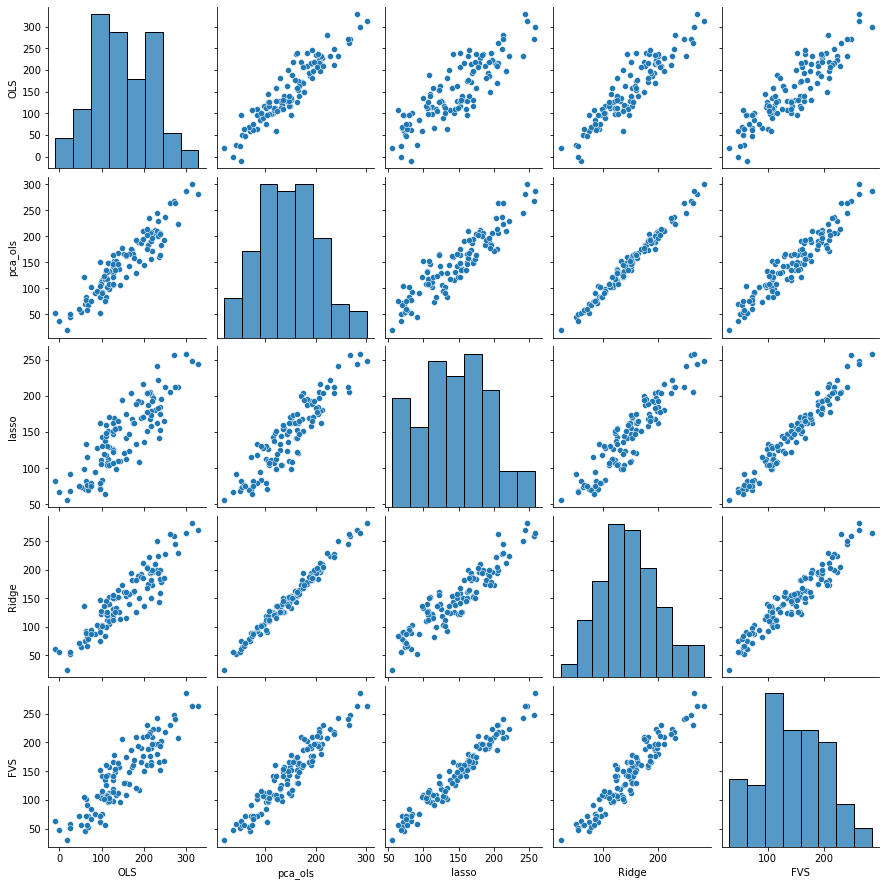

In [93]:
sns.pairplot(df_test)

The equation for the prediction of an unseen x is : $ y = \theta^{T} * x + constant$

#### Q17

In [94]:
from sklearn.datasets import load_diabetes

In [95]:
X_Diabetes,y_Diabetes = load_diabetes(return_X_y=True)

In [96]:
X= X_Diabetes[:,2]

In [97]:
print(np.shape(X),np.shape(y_Diabetes))

(442,) (442,)


In [98]:
linreg_p17 = LinearRegression()
linreg_p17.fit(X.reshape(-1,1),y_Diabetes.reshape(-1,1))
print('theta_1 is : ',linreg_p17.coef_)

theta_1 is :  [[949.43526038]]


In [99]:
print(linreg_p17.intercept_)

[152.13348416]


In [100]:
def linear_reg(X,y):
 beta = inv(X.T@X)@X.T@y
 #beta = 1/(X.T @ X)*X.T@y
 u=y-X@beta
 n,k = np.shape(X)
 sig2=u.T@u/(n-k)
 Var=sig2*1/(np.diag(X.T @ X))
 std=np.sqrt(Var)
 return beta, u, sig2, Var, std, n-k,

In [101]:
beta_p17,_,_,_,std_p17,deg_d = linear_reg(np.column_stack((np.ones(len(X),),X)),y_Diabetes)

In [134]:
print("The coefficient for the intercept and theta1:",beta_p17)

The coefficient for the intercept and theta1: [152.13348416 949.43526038]


In [138]:
alpha = 0.05
print("The t value for the double sided student test with Alpha = 0.05 is:",stat.t.ppf([alpha/2,1-alpha/2],deg_d))


The t value for the double sided student test with Alpha = 0.05 is: [-1.96537012  1.96537012]


The confidence interval is calculated by $[\hat{\theta_{j}}-t_{1-\alpha/2}*\hat{\sigma}*Var(X_{j})^{-1/2},\hat{\theta_{j}}+t_{1-\alpha/2}*\hat{\sigma}*Var(X_{j})^{-1/2} ]$

In [104]:
CI = beta_p17[1]+std_p17[1]*stat.t.ppf([alpha/2,1-alpha/2],deg_d)

In [105]:
print('The CI for the parameter theta_1 is ', CI)

The CI for the parameter theta_1 is  [ 826.56990761 1072.30061316]


In [106]:
k=np.linspace(10,10000)

In [108]:
Xy_concat = np.column_stack((X,y_Diabetes))

In [109]:
from sklearn.utils import resample

In [111]:
iter=0
thetas = []
for i in k:
    theta = []
    for j in range(int(i)):
        
        boot = resample(Xy_concat, replace=True, n_samples=len(Xy_concat), random_state=iter)
        linreg_p17 = LinearRegression()
        linreg_p17.fit(boot[:,0].reshape(-1,1),boot[:,1].reshape(-1,1))
        #print('theta_1 is : ',linreg_p17.coef_)
        theta.append(float(linreg_p17.coef_))
        iter+=1
        #print('The ',k, "value bootstrap finished")
        
    thetas.append(theta)

In [112]:
inf_v = []
sup_v = []
alpha = 0.05
for i in thetas:
    inf_v.append(np.quantile(np.array(i),alpha/2))
    sup_v.append(np.quantile(np.array(i),1-alpha/2))

We found that the approximated CI is around [835, 1063] which is smaller than the real CI which is [826.56990761 1072.30061316]. 

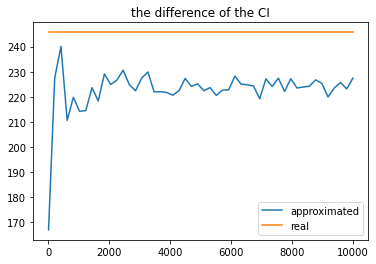

In [113]:
CI_dif = []
for i in range(len(inf_v)):
    CI_dif.append(sup_v[i]-inf_v[i])
    
plt.plot([int(i) for i in k],CI_dif, label='approximated')
plt.plot([int(i) for i in k],len(k)*[1072.30-826.56],label = 'real')
plt.title('the difference of the CI')
plt.legend()
plt.show()

We notice that the difference of CI from approximation is less than the counterpart of the real CI. 

The CI will decrease with increasing alpha because in the $[\hat{\theta_{j}}-t_{1-\alpha/2}*\hat{\sigma}*Var(X_{j})^{-1/2},\hat{\theta_{j}}+t_{1-\alpha/2}*\hat{\sigma}*Var(X_{j})^{-1/2} ]$ the $t_{1-\alpha/2}$ will decrease with increasing alpha